### For the extended part of your take-home code challenge, you should perform an _Inferential EDA_ on the following dataset:

🍷 [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv) 🔍

### You need to accomplish the following objectives:

- Perform at least three (3) data processing/cleaning techniques.
- Use sampling to reduce the dataset's size from 130k rows to less-than-100k rows.
  - Your sampling method should NOT dramatically affect the data's original distributions. In other words, the sampling should be somewhat random but also take into account the original data distributions.
- Clean/impute all null values using whatever techniques you deem necessary.
  - Justify your chosen technique(s).
- Ask and answer at least five (5) descriptive analysis questions.
- Ask and answer at least three (3) inferential analysis questions; you may use the following array of hypothesis testing techniques (you are not limited to these, but these are recommended to start with):
  - Student's t-Tests (1-sample, 2-sample)
  - ANOVA Tests (one-way, two-way)
  - Chi-Squared Tests (independence, goodness-of-fit)
  - Any additional hypothesis tests from [this article](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)
- Produce at least two (2) strong storytelling-oriented data visualizations to showcase any of the descriptive or inferential findings you have gathered.
- Write a short summary section at the bottom of your notebook that summarizes the extent of your data investigation.
  - In particular, ensure you interpret your inferential hypothesis tests adequately in this section.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


----
## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
df.shape

(129971, 14)

In [8]:
df.country.value_counts(dropna=False)

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
NaN                          63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16


In [13]:
# replace all null values in country with Unknown
df['country'] = df['country'].fillna('Unknown')

In [180]:
df['variety'] = df['variety'].fillna('Unknown')
df['province'] = df['province'].fillna('Unknown')

In [182]:
df['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', 'Anonymous', 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [181]:
df['taster_name'] = df['taster_name'].fillna('Anonymous')

We are cleaning up the data in a way that makes sense. For country and variety, there were a small number of items missing, so setting to unknown is useful because we can simply mask unknown values or we can categorize a region as unknown.

For Taster Name I set them as anonymous since their name wasn't provided. We can continue to use these rows, but we will group them as anonymous

In [183]:
df['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [184]:
df['price'].value_counts()

price
20.0     6940
15.0     6066
25.0     5805
30.0     4951
18.0     4883
         ... 
574.0       1
630.0       1
764.0       1
319.0       1
848.0       1
Name: count, Length: 390, dtype: int64

In [185]:
mean_price = df['price'].mean()

mode_price = df['price'].mode()[0]
median_price = df['price'].median()

mode_price, median_price, mean_price

(20.0, 25.0, 35.363389129985535)

In [186]:
df_clean = df.copy()

In [187]:
# create a new dataset where all NaN prices are dropped
df_clean = df_clean.dropna(subset=['price'])

In [188]:
#udpate df_clean so it only has columns country, price, points, province, taster_name, variety, winery
df_clean = df_clean[['country', 'price', 'points', 'province', 'taster_name', 'variety', 'winery']]


Now we can grab a sample of this data set to get a closer look. Let's work with a 6000.

In [189]:
df_sample = df_clean.sample(n=6000, random_state=42)

In [190]:
mean_price = df_sample['price'].mean()

mode_price = df_sample['price'].mode()[0]
median_price = df_sample['price'].median()

print(f'Mode: {mode_price}, Median: {median_price}, Mean: {mean_price}')

Mode: 20.0, Median: 25.0, Mean: 35.744166666666665


In [191]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 30391 to 24925
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6000 non-null   object 
 1   price        6000 non-null   float64
 2   points       6000 non-null   int64  
 3   province     6000 non-null   object 
 4   taster_name  6000 non-null   object 
 5   variety      6000 non-null   object 
 6   winery       6000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 375.0+ KB


_____

## Descriptive Analysis

### What are the countries with the most expensive wines?

In [195]:
top_countries_for_price = df_sample.groupby('country')['price'].mean().sort_values(ascending=False).head(10)


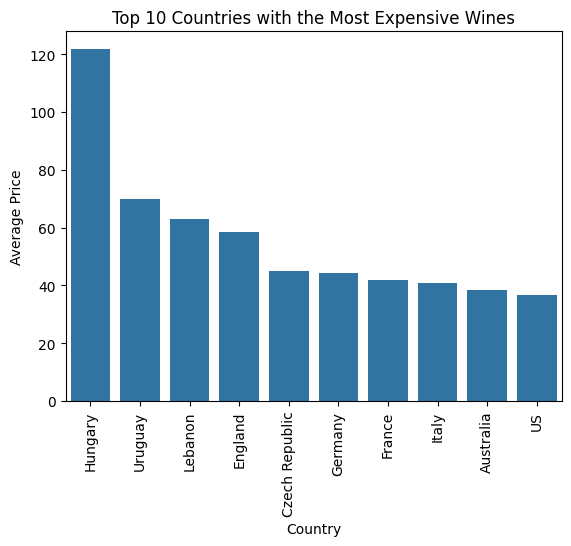

In [198]:
sns.barplot(x=top_countries_for_price.index, y=top_countries_for_price.values)
plt.xticks(rotation=90)
plt.title('Top 10 Countries with the Most Expensive Wines')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.show()

### Does province have an impact on their countries wine cost?

KeyError: 'province'